<img src="http://www.cement.org/images/default-source/contech/curing_fig1.jpg?sfvrsn=2"/>

#Goal

Try to recreate the plot above using plot below to figure out the function.

<img src="http://www.ce.memphis.edu/1101/notes/concrete/graphics/conc3.gif"/>

Note that the plot's x-axis is log.  Additionally after the 90 day mark in the first plot it seems to be linear, ergo piecewise. 

$$x = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2 a}$$

$$y = c(1 - e^{a t +b})$$

$$Y = \frac{y}{c}$$

$$Y =1 - e^{a t +b}$$

$$1 - Y = e^{a t +b}$$

$$\log(1 -Y) = \log( e^{a t +b})$$

$$\log(1 -Y) = a t +b$$

$$x = a \log(t) + b$$

## Going from moist cure to air

This should be a second order curve that is tangent at the beginning and goes flat after 7 days.

$$\frac{dy}{dt} =  \frac{d (c(1 - e^{a t +b}))}{dt}$$

$$\frac{dy}{dt} =  -a c e^{a t +b}$$

$$y_1 = a_1 t^2 + b_1 t + c_1$$

$$\frac{d y_1}{dt} = 2 a_1 t + b_1$$

$$\therefore$$

$$y' = -a c e^{a t_1 +b} = 2 a_1 t_1 + b_1$$

$$y = c(1 - e^{a t_1 +b}) = a_1 t_1^2 + b_1 t_1 +c_1$$

$$\text{also...}$$

$$2 a_1 (t_1 +7) + b_1 = 0$$

$$X = \left[\begin{array}{ccc} 2 t_1 & 1 & 0 \\ t_1^2 & t_1 & 1\\2 (t_1 +7) & 1 &0 \\ \end{array} \right]$$
$$C = \left[\begin{array}{c}a_1  \\ b_1  \\ c_1 \\ \end{array} \right]$$
$$Y = \left[\begin{array}{c}y'  \\ y \\ 0 \\ \end{array} \right]$$

$$C = X^{-1} Y$$

In [129]:
import sympy as sp
sp.init_printing(use_unicode=True)
c, a, b, t = sp.symbols("c a b t")
sp.diff(c*(1-sp.exp(a*t+b)),t)

In [3]:
from scipy.optimize import leastsq
from numpy import exp

In [29]:
def residuals(p, y, t):
    a, b = p
    err = y - (a*t+b)
    return err

In [132]:
import numpy as np
from scipy import stats
t = [0,3,7,14,28,41]#365]
scale = 2
txt = """0.0030672566
0.3765289809
0.5975573484
0.8795590586
1.0015057441
1.0243707477"""
y = [float(x.strip()) for x in txt.split('\n')]
# C = len(y)
# Y = []
# for i, x in enumerate(y):
#     mag = (i+1)/(C+1)*scale
#     print(mag)
#     Y.append(x*mag)
# y = Y
# y.append(1.0243707477*scale)
print(y)
c = y[-1]
y = [x / c for x in y]
Y = [np.log(1-x) for x in y[:-1]]
# len(Y)

slope, intercept, r_value, p_value, std_err = stats.linregress(t[:-1],Y)
print((slope, intercept, r_value, p_value, std_err))

a, b = slope, intercept

[0.0030672566, 0.3765289809, 0.5975573484, 0.8795590586, 1.0015057441, 1.0243707477]
(-0.13588856055418194, -0.0058187419741078106, -0.99939896558043961, 1.7686573978521226e-05, 0.0027213398331038994)


In [156]:
a


$$X = \left[\begin{array}{ccc} 2 t_1 & 1 & 0 \\ t_1^2 & t_1 & 1\\2 (t_1 +7) & 1 &0 \\ \end{array} \right]$$
$$C = \left[\begin{array}{c}a_1  \\ b_1  \\ c_1 \\ \end{array} \right]$$
$$Y = \left[\begin{array}{c}y'  \\ y \\ 0 \\ \end{array} \right]$$

$$C = X^{-1} Y$$

In [185]:
Tr = 7 #drying out time in days

def moist(t, C = c, A=a):
    y = C*(1-np.exp(A*t+b))
    return y

def dry(t, t_0, C = c, A=a, tr = Tr):
    y = C*(1-np.exp(A*t_0+b))
    y_ = -C*A*np.exp(A*t_0+b)
    Y = np.matrix([[y_],[y],[0]])
    X = np.matrix([[2*t_0, 1,0],[t_0**2, t_0, 1],[2*(t_0+tr), 1, 0]])
    cof = np.linalg.inv(X)*Y
    a_1, b_1, c_1 = map(float,cof)
    y_1 = a_1*t**2+b_1*t+c_1
    return y_1

def f_c(t, C = c, A=a,t_0 = None, tr = Tr):
    if t_0==None:
        y=moist(t, C, A)
    elif t<=t_0:
        y=moist(t, C, A)
    elif t_0<t<=t_0+tr:
        y=dry(t, t_0, C, A, tr)
    else:
        y=dry(t_0+tr, t_0, C, A, tr)
    return y



print([f_c(x) for x in t])
f_c(0)

[0.0059432412044351061, 0.34691151708017826, 0.63098324717090826, 0.87241714807164972, 1.0016986416416453, 1.020495598855012]


In [140]:
print((f_c(0),f_c(365)))

(0.0059432412044351061, 1.0243707476999999)


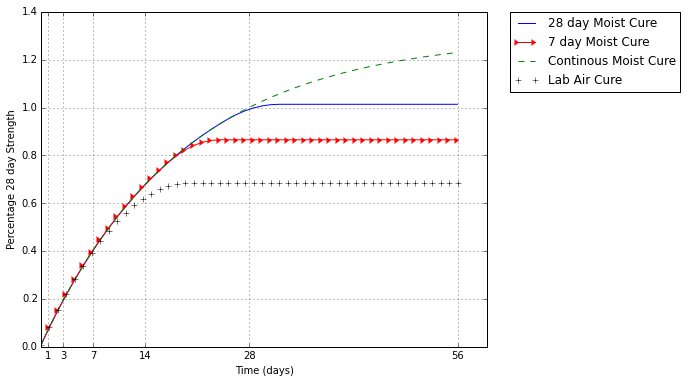

In [196]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(8,6))
x = np.linspace(0, 56)
m = 1.30
def a_m(t,t_0):
    if t_0>0:
        bb = t_0/28 if t>t_0 else 1
    else:
        bb=1
    am = 1/((2)*m)
    return am
y = [f_c(X,m,a*a_m(X,28), 25) for X in x]

y_1 = [f_c(X,m,a*a_m(X,7),17) for X in x]

y_2 = [f_c(X,m,a*a_m(X,90)) for X in x]

y_3 = [f_c(X,m,a*a_m(X,7),3, tr=17) for X in x]
ax.plot(x, y,  'b',label="28 day Moist Cure")
ax.plot(x, y_1, marker=5, color='r',label="7 day Moist Cure")
ax.plot(x, y_2, 'g--',label="Continous Moist Cure")
ax.plot(x, y_3, '+',color="black",label="Lab Air Cure")
ax.grid(True)

ax.set_xlabel("Time (days)")
# ax.set_xscale('log')
ax.set_xticks(ticks=[1,3,7,14,28,56])
ax.set_xticklabels([1,3,7,14,28,56])
# ax.xaxis.
ax.set_ylabel("Percentage 28 day Strength")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# ax.show()
fig.savefig("Strength_vs_time.svg",bbox_inches='tight')

In [86]:
8.1/6.4

1.2656249999999998